
Mean Squared Error: 2.2240
R² Score: -0.2356


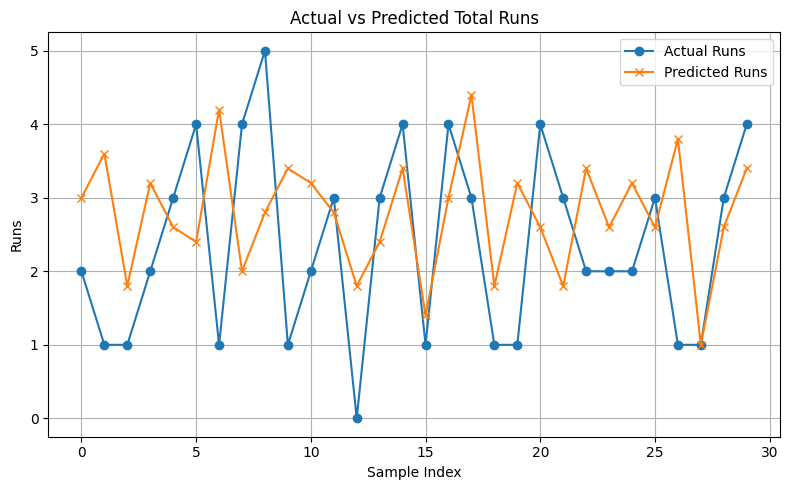


Predicted Total Runs for this delivery: 1.60


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create synthetic dataset
n_samples = 200
df = pd.DataFrame({
    'Batsman': np.random.choice(['V Kohli', 'MS Dhoni', 'R Sharma', 'KL Rahul', 'SK Yadav'], n_samples),
    'Bowler': np.random.choice(['JJ Bumrah', 'R Ashwin', 'YS Chahal', 'B Kumar', 'H Patel'], n_samples),
    'Over': np.random.randint(1, 20, n_samples),
    'BattingTeam': np.random.choice(['RCB', 'CSK', 'MI', 'KKR', 'LSG'], n_samples),
    'BowlingTeam': np.random.choice(['RR', 'GT', 'SRH', 'DC', 'PBKS'], n_samples),
    'ExtraRuns': np.random.randint(0, 3, n_samples),
})

df['TotalRuns'] = np.random.poisson(1.5, n_samples) + df['ExtraRuns']

# Step 2: Encode categorical features
encoders = {
    'Batsman': LabelEncoder(),
    'Bowler': LabelEncoder(),
    'BattingTeam': LabelEncoder(),
    'BowlingTeam': LabelEncoder()
}

for col in encoders:
    df[col] = encoders[col].fit_transform(df[col])

# Step 3: Feature matrix and target
X = df[['Batsman', 'Bowler', 'Over', 'BattingTeam', 'BowlingTeam', 'ExtraRuns']]
y = df['TotalRuns']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 7: Visualize Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:30], label='Actual Runs', marker='o')
plt.plot(y_pred[:30], label='Predicted Runs', marker='x')
plt.title('Actual vs Predicted Total Runs')
plt.xlabel('Sample Index')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Predict for a new delivery
sample = pd.DataFrame([{
    'Batsman': encoders['Batsman'].transform(['V Kohli'])[0],
    'Bowler': encoders['Bowler'].transform(['JJ Bumrah'])[0],
    'Over': 15,
    'BattingTeam': encoders['BattingTeam'].transform(['RCB'])[0],
    'BowlingTeam': encoders['BowlingTeam'].transform(['SRH'])[0],
    'ExtraRuns': 1
}])

predicted = knn.predict(sample)
print(f"\nPredicted Total Runs for this delivery: {predicted[0]:.2f}")



Mean Squared Error: 2.4580
R² Score: 0.0722


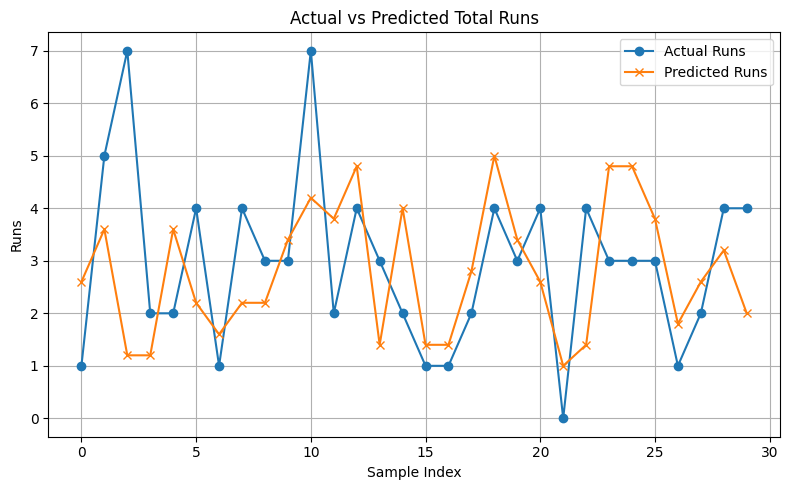


Predicted Total Runs for this delivery: 2.00


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create synthetic dataset
n_samples = 200
df = pd.DataFrame({
    'Batsman': np.random.choice(['V Kohli', 'MS Dhoni', 'R Sharma', 'KL Rahul', 'SK Yadav'], n_samples),
    'Bowler': np.random.choice(['JJ Bumrah', 'R Ashwin', 'YS Chahal', 'B Kumar', 'H Patel'], n_samples),
    'Over': np.random.randint(1, 20, n_samples),
    'BattingTeam': np.random.choice(['RCB', 'CSK', 'MI', 'KKR', 'LSG'], n_samples),
    'BowlingTeam': np.random.choice(['RR', 'GT', 'SRH', 'DC', 'PBKS'], n_samples),
    'ExtraRuns': np.random.randint(0, 3, n_samples),
})

df['TotalRuns'] = np.random.poisson(1.5, n_samples) + df['ExtraRuns']

# Step 2: Encode categorical features
encoders = {
    'Batsman': LabelEncoder(),
    'Bowler': LabelEncoder(),
    'BattingTeam': LabelEncoder(),
    'BowlingTeam': LabelEncoder()
}

for col in encoders:
    df[col] = encoders[col].fit_transform(df[col])

# Step 3: Scale numeric features ('Over' and 'ExtraRuns')
scaler = StandardScaler()
df[['Over', 'ExtraRuns']] = scaler.fit_transform(df[['Over', 'ExtraRuns']])

# Step 4: Feature matrix and target
X = df[['Batsman', 'Bowler', 'Over', 'BattingTeam', 'BowlingTeam', 'ExtraRuns']]
y = df['TotalRuns']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 8: Visualize Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:30], label='Actual Runs', marker='o')
plt.plot(y_pred[:30], label='Predicted Runs', marker='x')
plt.title('Actual vs Predicted Total Runs')
plt.xlabel('Sample Index')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Predict for a new delivery (with scaled numeric features)
sample = pd.DataFrame([{
    'Batsman': encoders['Batsman'].transform(['V Kohli'])[0],
    'Bowler': encoders['Bowler'].transform(['JJ Bumrah'])[0],
    'Over': 15,
    'BattingTeam': encoders['BattingTeam'].transform(['RCB'])[0],
    'BowlingTeam': encoders['BowlingTeam'].transform(['SRH'])[0],
    'ExtraRuns': 1
}])

# Scale numeric features of sample
sample[['Over', 'ExtraRuns']] = scaler.transform(sample[['Over', 'ExtraRuns']])

predicted = knn.predict(sample)
print(f"\nPredicted Total Runs for this delivery: {predicted[0]:.2f}")
